In [217]:
import numpy as np
import matplotlib.pyplot as plt


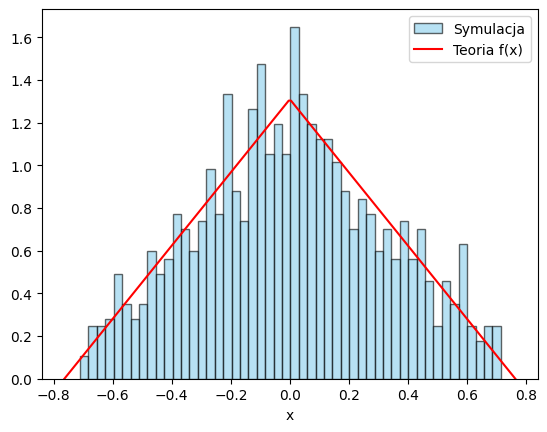

In [218]:
#generujemy losowe wartości dla szumu
n = 1000
U = np.random.rand(n)

X = np.where(U < 0.5,
             -1 + np.sqrt(2 * U),
             1 - np.sqrt(2 * (1 - U)))

desired_var = 0.1 # wariancja
current_var = np.var(X)
scale_factor = np.sqrt(desired_var / current_var)
#scale_factor = 1
noise = X * scale_factor
#noise = X
plt.hist(noise, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Symulacja')

x_vals = np.linspace(-1, 1, 200) * scale_factor
f = np.where(x_vals < 0, x_vals / scale_factor + 1, 1 - x_vals / scale_factor) / scale_factor
plt.plot(x_vals, f, 'r-', label='Teoria f(x)')

plt.xlabel('x')
plt.legend()
plt.show()


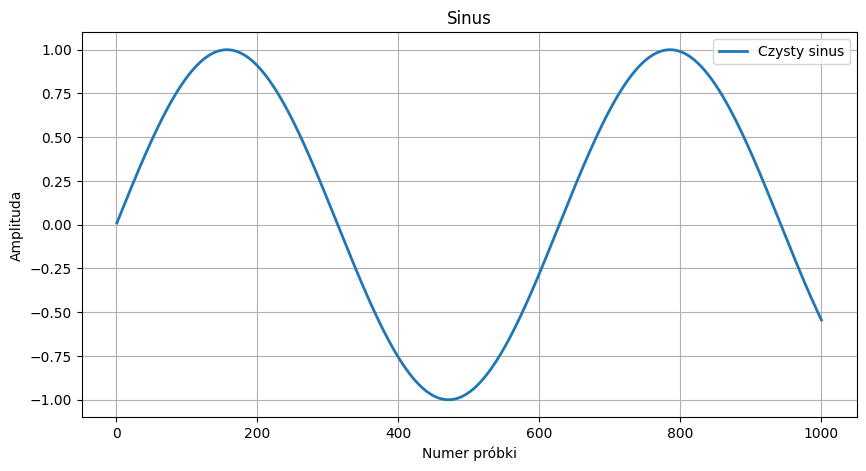

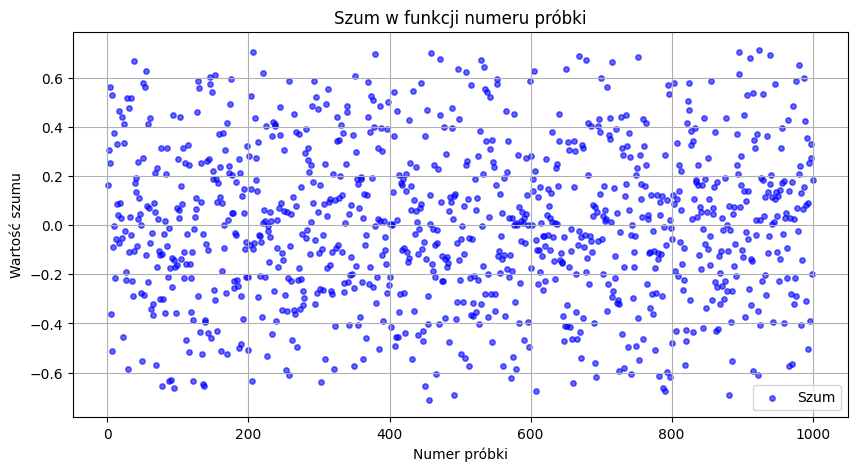

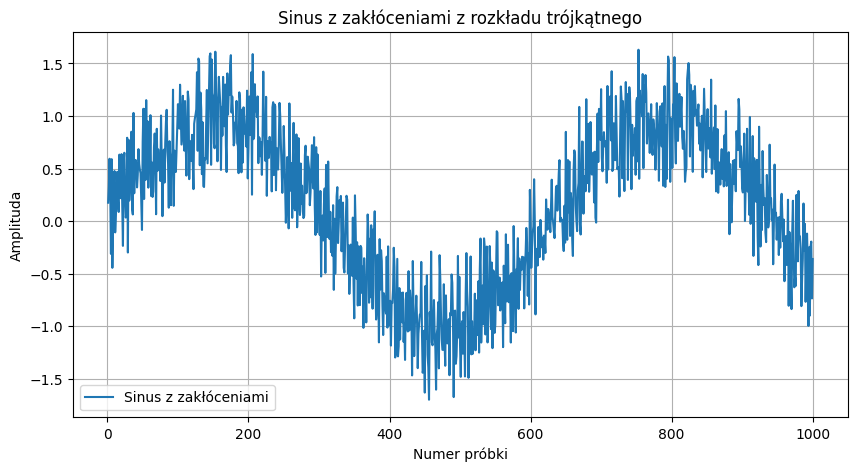

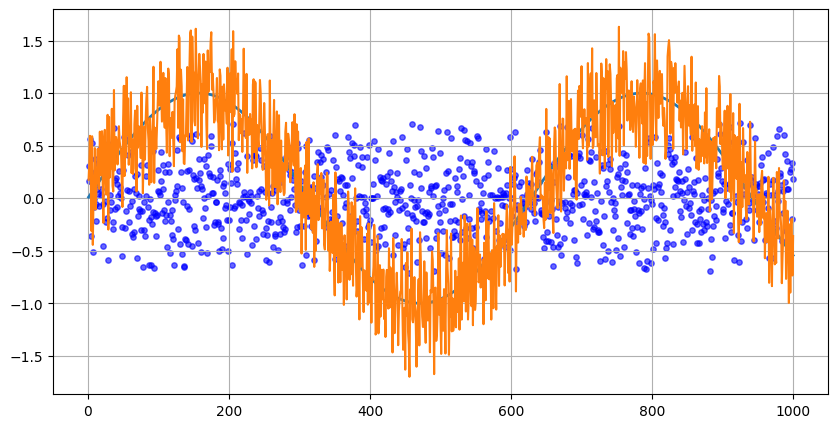

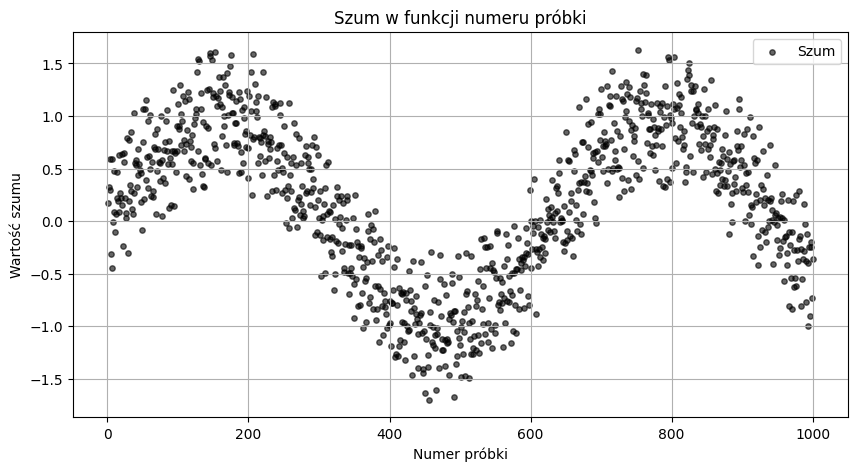

In [219]:

# --- Parametry ---
n = 1000
A = 1        
f = 1        
sample_numbers = np.arange(1, n + 1)  # numery próbek: 1,2,3,...,n

y_clean = A * np.sin(0.01 * sample_numbers) 
y_noisy = y_clean + noise

# --- Rysowanie ---
plt.figure(figsize=(10, 5))
plt.plot(sample_numbers, y_clean, label='Czysty sinus', linewidth=2)
plt.title('Sinus')
plt.xlabel('Numer próbki')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.scatter(sample_numbers, noise, color='blue', s=15, alpha=0.6, label='Szum')
plt.title('Szum w funkcji numeru próbki')
plt.xlabel('Numer próbki')
plt.ylabel('Wartość szumu')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(sample_numbers, y_noisy, label='Sinus z zakłóceniami')
plt.title('Sinus z zakłóceniami z rozkładu trójkątnego')
plt.xlabel('Numer próbki')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(sample_numbers, y_clean, label='Czysty sinus', linewidth=2)
plt.scatter(sample_numbers, noise, color='blue', s=15, alpha=0.6, label='Szum')
plt.plot(sample_numbers, y_noisy, label='Sinus z zakłóceniami')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.scatter(sample_numbers, y_noisy, color='black', s=15, alpha=0.6, label='Szum')
plt.title('Szum w funkcji numeru próbki')
plt.xlabel('Numer próbki')
plt.ylabel('Wartość szumu')
plt.legend()
plt.grid(True)
plt.show()


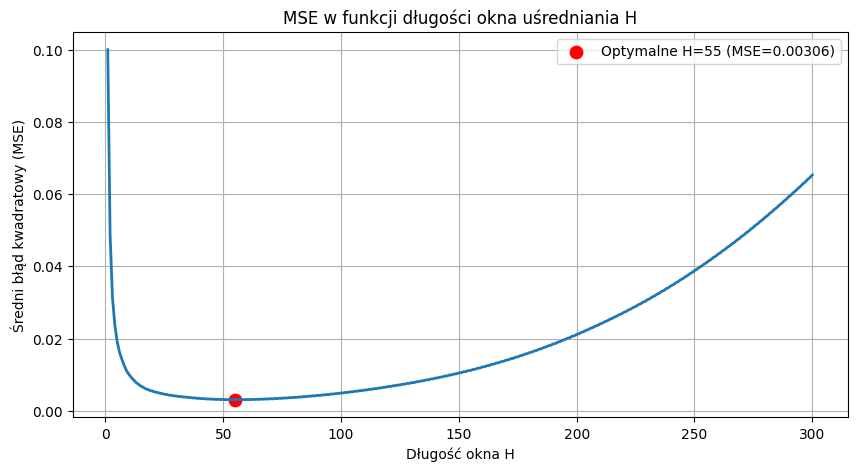

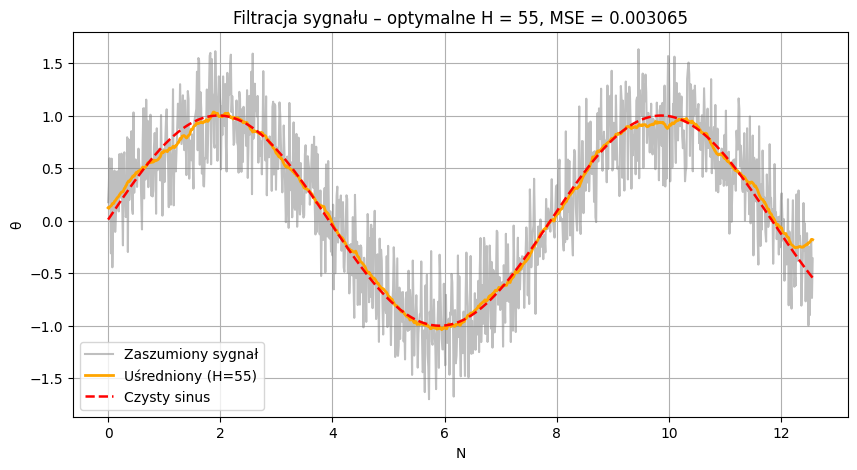

Optymalne H = 55, minimalne MSE = 0.003065


In [220]:
import numpy as np
import matplotlib.pyplot as plt

# --- Filtracja przez uśrednianie ruchome ---
def moving_average_fast(theta, H):
    return np.convolve(theta, np.ones(H) / H, mode='same')

# --- Zakres H (liniowy) ---
H_values = np.arange(1, 301)  # od 1 do 200 włącznie
mse_values = []

# --- Liczenie MSE dla każdego H ---
for H in H_values:
    theta_hat = moving_average_fast(y_noisy, H)
    mse = np.mean((theta_hat - y_clean) ** 2)
    mse_values.append(mse)

mse_values = np.array(mse_values)
best_H = H_values[np.argmin(mse_values)]
best_mse = np.min(mse_values)

# --- Wykres MSE w funkcji H ---
plt.figure(figsize=(10, 5))
plt.plot(H_values, mse_values, '-', linewidth=2)
plt.scatter(best_H, best_mse, color='red', s=80, label=f'Optymalne H={best_H} (MSE={best_mse:.5f})')
plt.xlabel('Długość okna H')
plt.ylabel('Średni błąd kwadratowy (MSE)')
plt.title('MSE w funkcji długości okna uśredniania H')
plt.legend()
plt.grid(True)
plt.show()

# --- Wykres porównawczy dla najlepszego H ---
theta_hat_best = moving_average_fast(y_noisy, best_H)

plt.figure(figsize=(10,5))
plt.plot(t, y_noisy, color='gray', alpha=0.5, label='Zaszumiony sygnał')
plt.plot(t, theta_hat_best, color='orange', linewidth=2, label=f'Uśredniony (H={best_H})')
plt.plot(t, y_clean, '--', color='red', linewidth=1.8, label='Czysty sinus')
plt.xlabel('N')
plt.ylabel('θ')
plt.legend()
plt.grid(True)
plt.title(f'Filtracja sygnału – optymalne H = {best_H}, MSE = {best_mse:.6f}')
plt.show()

print(f"Optymalne H = {best_H}, minimalne MSE = {best_mse:.6f}")



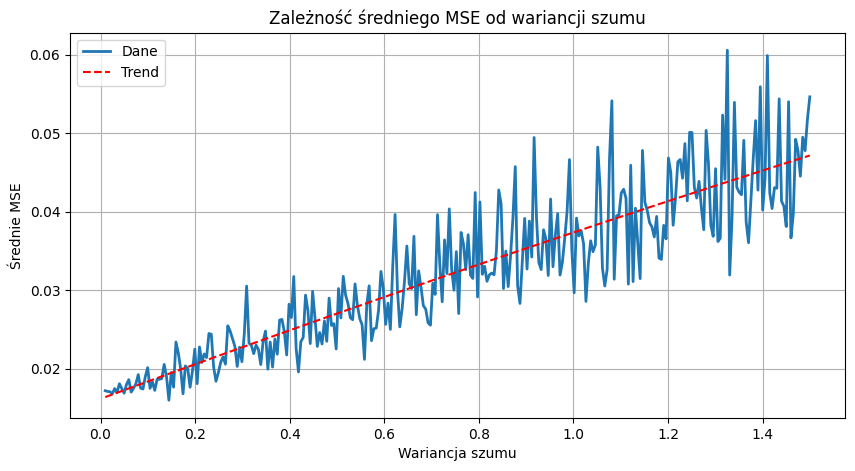

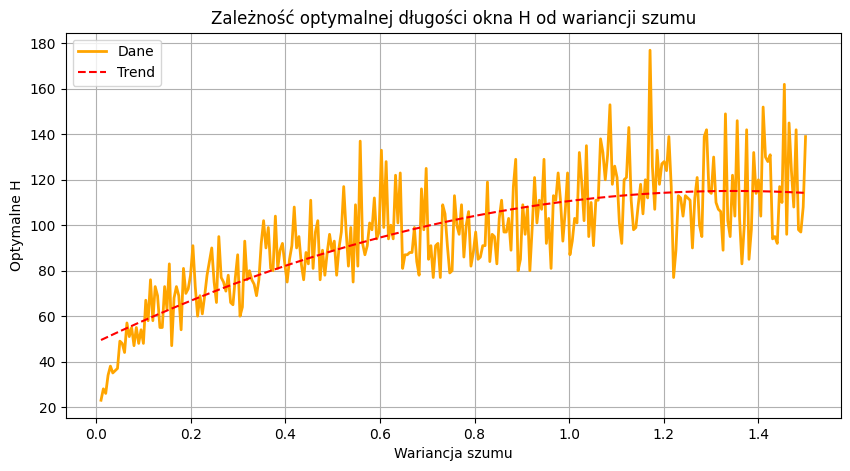

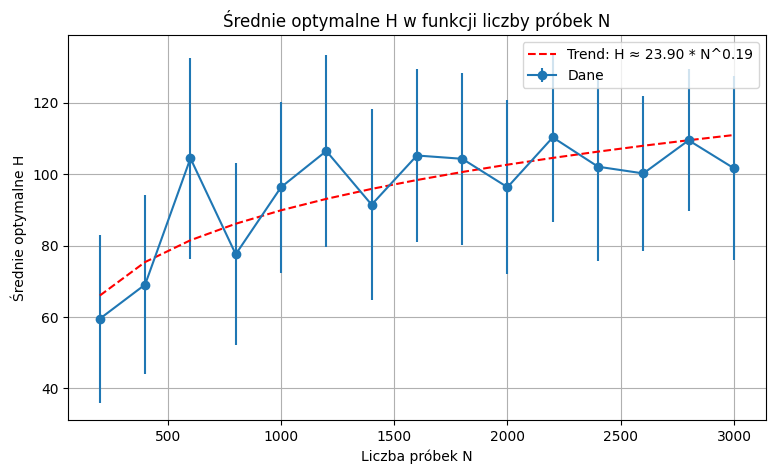

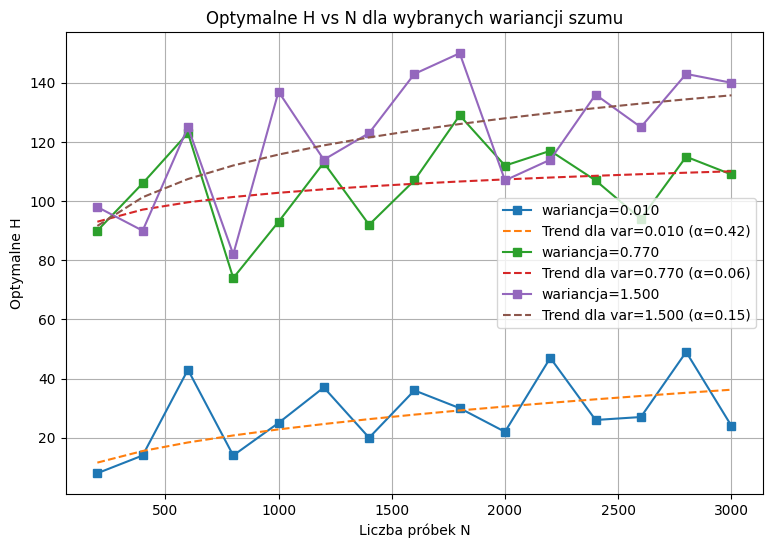

In [221]:
import numpy as np
import matplotlib.pyplot as plt

# --- Funkcja do generowania szumu o rozkładzie trójkątnym z daną wariancją ---
def generate_triangular_noise(n, desired_var):
    U = np.random.rand(n)
    X = np.where(U < 0.5, -1 + np.sqrt(2 * U), 1 - np.sqrt(2 * (1 - U)))
    current_var = np.var(X)
    if current_var == 0:
        return np.zeros(n)
    scale_factor = np.sqrt(desired_var / current_var)
    return X * scale_factor

# --- Filtr uśredniający ---
def moving_average_fast(theta, H):
    if H <= 0:
        return theta
    return np.convolve(theta, np.ones(H) / H, mode='same')


# ============================================================
# CZĘŚĆ 1 — Zależność od wariancji szumu
# ============================================================

n = 1000
sample_numbers = np.arange(1, n + 1)
A = 1
y_clean = A * np.sin(0.01 * sample_numbers)

noise_variances = np.linspace(0.01, 1.5, 300)
mean_MSE_list = []
best_H_list = []

for desired_var in noise_variances:
    noise = generate_triangular_noise(n, desired_var)
    y_noisy = y_clean + noise

    H_values = np.arange(1, 301)
    mse_values = []

    for H in H_values:
        theta_hat = moving_average_fast(y_noisy, H)
        mse = np.mean((theta_hat - y_clean) ** 2)
        mse_values.append(mse)

    mse_values = np.array(mse_values)
    mean_mse = np.mean(mse_values)
    best_H = H_values[np.argmin(mse_values)]

    mean_MSE_list.append(mean_mse)
    best_H_list.append(best_H)


# --- Wykres 1: średnie MSE w funkcji wariancji szumu ---
plt.figure(figsize=(10, 5))
plt.plot(noise_variances, mean_MSE_list, '-', linewidth=2, label='Dane')
# linia trendu (dopasowanie wielomianu 2 stopnia)
coeff_mse = np.polyfit(noise_variances, mean_MSE_list, 2)
trend_mse = np.polyval(coeff_mse, noise_variances)
plt.plot(noise_variances, trend_mse, 'r--', label='Trend')
plt.xlabel('Wariancja szumu')
plt.ylabel('Średnie MSE')
plt.title('Zależność średniego MSE od wariancji szumu')
plt.legend()
plt.grid(True)
plt.show()

# --- Wykres 2: optymalne H w funkcji wariancji szumu ---
plt.figure(figsize=(10, 5))
plt.plot(noise_variances, best_H_list, '-', color='orange', linewidth=2, label='Dane')
# linia trendu (dopasowanie wielomianu 2 stopnia)
coeff_H = np.polyfit(noise_variances, best_H_list, 2)
trend_H = np.polyval(coeff_H, noise_variances)
plt.plot(noise_variances, trend_H, 'r--', label='Trend')
plt.xlabel('Wariancja szumu')
plt.ylabel('Optymalne H')
plt.title('Zależność optymalnej długości okna H od wariancji szumu')
plt.legend()
plt.grid(True)
plt.show()


# ============================================================
# CZĘŚĆ 2 — Zależność optymalnego H od liczby próbek N
# ============================================================

A = 1.0
N_values = np.linspace(200, 3000, 15, dtype=int)
noise_variances_small = np.linspace(0.01, 1.5, 50)
H_max_global = 400

best_H_matrix = np.zeros((len(N_values), len(noise_variances_small)), dtype=int)

for iN, n in enumerate(N_values):
    sample_numbers = np.arange(1, n + 1)
    y_clean = A * np.sin(0.01 * sample_numbers)
    H_max = min(H_max_global, max(1, n // 2))
    H_values = np.arange(1, H_max + 1)

    for iv, desired_var in enumerate(noise_variances_small):
        noise = generate_triangular_noise(n, desired_var)
        y_noisy = y_clean + noise
        mse_values = []

        for H in H_values:
            theta_hat = moving_average_fast(y_noisy, H)
            mse = np.mean((theta_hat - y_clean) ** 2)
            mse_values.append(mse)

        best_H = H_values[np.argmin(mse_values)]
        best_H_matrix[iN, iv] = best_H

# --- Średnie optymalne H po wszystkich wariancjach ---
mean_best_H_per_N = best_H_matrix.mean(axis=1)
std_best_H_per_N = best_H_matrix.std(axis=1)

# --- Wykres 3: Średnie optymalne H w funkcji N ---
plt.figure(figsize=(9, 5))
plt.errorbar(N_values, mean_best_H_per_N, yerr=std_best_H_per_N, marker='o', linestyle='-', label='Dane')
# linia trendu (dopasowanie potęgowe: H = k * N^α)
coeffs = np.polyfit(np.log(N_values), np.log(mean_best_H_per_N), 1)
alpha = coeffs[0]
k = np.exp(coeffs[1])
trend_HN = k * N_values**alpha
plt.plot(N_values, trend_HN, 'r--', label=f'Trend: H ≈ {k:.2f} * N^{alpha:.2f}')
plt.xlabel('Liczba próbek N')
plt.ylabel('Średnie optymalne H')
plt.title('Średnie optymalne H w funkcji liczby próbek N')
plt.legend()
plt.grid(True)
plt.show()

# --- Wykres 4: Optymalne H vs N dla wybranych wariancji ---
indices_to_plot = [0, len(noise_variances_small)//2, -1]
plt.figure(figsize=(9, 6))
for idx in indices_to_plot:
    plt.plot(N_values, best_H_matrix[:, idx], marker='s', linestyle='-', label=f'wariancja={noise_variances_small[idx]:.3f}')
    # linia trendu (dopasowanie potęgowe)
    coeffs = np.polyfit(np.log(N_values), np.log(best_H_matrix[:, idx]), 1)
    alpha = coeffs[0]
    k = np.exp(coeffs[1])
    trend = k * N_values**alpha
    plt.plot(N_values, trend, '--', linewidth=1.5, label=f'Trend dla var={noise_variances_small[idx]:.3f} (α={alpha:.2f})')

plt.xlabel('Liczba próbek N')
plt.ylabel('Optymalne H')
plt.title('Optymalne H vs N dla wybranych wariancji szumu')
plt.legend()
plt.grid(True)
plt.show()
